----
<h1 align="center"><span style='font-family:Georgia'> G-Research Cryptocurrency Forecasting </span></h1>

---

### Proplem Statement
To Evaluate the model, historical cryptocurrency dataset is utilized with the objective of constructing time series forecasting models. A time series analysis is carried out to extract information from the entire dataset and preprocess the data by incorporating additional features. Subsequently, an ARIMA model is selected as the traditional baseline model. Several neural network time series models, including DLinear, NLinear, Informer, FEDformer, and PatchTST, are then assessed on the data to examine their forecasting performance in comparison to the ARIMA baseline.
> This work aims to identify the best approach for 15-minute ahead forecasting of the cryptocurrency log return (Target column) over the next 15 minutes.

### Dataset Description

- **timestamp**: All timestamps are returned as second Unix timestamps (the number of seconds elapsed since 1970-01-01 00:00:00.000 UTC). Timestamps in this dataset are multiple of 60, indicating minute-by-minute data.
- **Asset_ID**: TThis column contains an ID number that corresponds to a specific cryptocurrency. For example, an Asset_ID of 1 corresponds to Bitcoin. A mapping from Asset_ID to the name of the cryptocurrency can be found in a separate file called `asset_details.csv`.
- **Count**: Total number of trades in the time interval (last minute).
- **Open**: Opening price of the time interval (in USD).
- **High**: Highest price reached during time interval (in USD).
- **Low**: Lowest price reached during time interval (in USD).
- **Close**: Closing price of the time interval (in USD).
- **Volume**: The quantity of the cryptocurrency that was bought or sold during the minute of trading activity represented by the corresponding timestamp, measured in USD.
- **VWAP**: The average price of the asset over the time interval, weighted by volume. VWAP is an aggregated form of trade data.
- **Target**: This column contains the residual log-returns for the cryptocurrency over a 15-minute horizon. Residual log-returns are a way of measuring the percentage change in the price of an asset over a given time period, relative to some baseline. The Target column in this dataset represents the residual log-returns for a 15-minute period starting from the minute represented by the corresponding timestamp.

Additional information about cryptocurrencies include:

- **Asset_ID** : An ID code for the cryptocurrency.
- **Asse_Name** : The real name of the cryptocurrency associated to Asset_ID.
- **Weight** : The weight that the cryptocurrency associated to Asset_ID receives in the evaluation metric.

#### **The Evaluation Criteria**

- **MAE (Mean Absolute Error)** - The average magnitude of the errors in the predictions and gives an idea of the accuracy of the predictions.
- **MAPE (Mean Absolute Percentage Error)** - The average magnitude of the percentage error, useful to nullify the effect of different scales in values.
- **MSE (Mean Squared Error)** - The average of the square of the errors. MSE is more sensitive to large errors compared to MAE.

**So in summary, a good model will have:**
- Low MAE, MAPE and MSE

---
## Notebook Content
The notebook focuses on time series analysis and forecasting using various traditional and transformer-based models. The content of the notebook is organized into several sections:

### (1) Check Data Quality.
### (2) Time Series Analysis.

- Data Distribution.
- Candlestick Chart.
- Stationarity.
- Simple Moving Average (SMA).
- Exponential Smoothing.
- Average True Range (ATR).
- Seasonal and Trend Decomposition.
- ACF and PACF.

### (3) Feature Engineering
- Technical Indicators Features (RSI, ATR, and DEMA).
- Lag Features Features ( SMA and Return).
- New Price-based Features (HL, OC, Lower Shadow, and Upper Shadow).
- Datetime Features (Day, dayofyear, Season).

### (4) Modeling Hourly Cryptocurrancy Dataset
- Evaluating the dataset DLinear
- Evaluating the dataset NLinear
- Evaluating the dataset Informer
- Evaluating the dataset FEDfromer
- Evaluating the dataset PathchTST

### (5) Analysis the Results

---
# Setup
---

In [1]:
!pip install opendatasets

In [2]:
!pip install torchscan 

In [2]:
!pip install mplfinance 

In [3]:
!pip install pmdarima

In [4]:
!pip install alive-progress

  Obtaining dependency information for alive-progress from https://files.pythonhosted.org/packages/e3/02/5d7f9158d69b36fbe9eb0df8fb435008ec881e41bc7d839239004207d807/alive_progress-3.1.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 473.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.5 MB/s eta 0:00:00

In [ ]:
!git clone https://github.com/debi2023-group3/Transformer-based-solutions-for-the-long-term-time-series-forecasting

In [ ]:
import os
import sys

%cd 
os.chdir('Transformer-based-solutions-for-the-long-term-time-series-forecasting')

print(f'Your current dir: {os.getcwd()}')

if not 'Transformer-based-solutions-for-the-long-term-time-series-forecasting' in sys.path:
    sys.path += ['Transformer-based-solutions-for-the-long-term-time-series-forecasting']

**Import needed dependencies**

In [4]:
import os
import time
import pandas as pd
import numpy as np
import random
import itertools
from tqdm import tqdm
import opendatasets as od 

#Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import mplfinance as mpf

# statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
import statsmodels.tsa.api as smt

from statsmodels.tools.eval_measures import rmse, aic
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff


import torch
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Allocate color palette**

In [4]:
plt.style.use('seaborn-white')
%matplotlib inline

RdBu_colors  = sns.color_palette("RdBu",15)
pastel_colors  = sns.color_palette("pastel",15)
blind_colors = sns.color_palette("colorblind", 15)
sns.set_theme(style="whitegrid", palette=RdBu_colors)

style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 10});
fig = mpf.figure(figsize=(18, 5), style=style);
    
RdBu_colors
pastel_colors
blind_colors

[(0.5884659746251442, 0.05905420991926182, 0.1510957324106113),
 (0.7340253748558246, 0.16608996539792387, 0.20261437908496732),
 (0.8226066897347174, 0.34325259515570933, 0.28627450980392155),
 (0.8991926182237601, 0.5144175317185697, 0.4079200307574009),
 (0.9617070357554787, 0.6761245674740484, 0.546943483275663),
 (0.9838523644752019, 0.8089965397923875, 0.7167243367935409),
 (0.9829296424452134, 0.9018838908112264, 0.8542099192618224),
 (0.9657054978854287, 0.9672433679354094, 0.9680891964628989),
 (0.8722029988465976, 0.9229527104959632, 0.9508650519031142),
 (0.7517877739331029, 0.8635909265667053, 0.9217993079584775),
 (0.5967704728950406, 0.7848519800076895, 0.8775086505190313),
 (0.4085351787773935, 0.6687427912341408, 0.8145328719723184),
 (0.24183006535947713, 0.5487889273356401, 0.750557477893118),
 (0.15816993464052287, 0.43806228373702427, 0.6939638600538255),
 (0.08419838523644753, 0.31280276816609, 0.5534025374855824)]

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353),
 (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0)]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

<Mpf_Figure size 1800x500 with 0 Axes>

In [5]:
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

**Download dataset from kaggle**
You may need to upload kaggle token file from dir: `./Datasets/CustomData/kaggle.json`.
- username:"hebamo7amed"
- key:"dc5470313c833c4962ebace8898816fa"

In [12]:
od.download("https://www.kaggle.com/competitions/g-research-crypto-forecasting/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  hebamo7amed


Your Kaggle Key:

  ································


100%|██████████| 1.13G/1.13G [00:21<00:00, 56.2MB/s]



Extracting archive ./g-research-crypto-forecasting/g-research-crypto-forecasting.zip to ./g-research-crypto-forecasting


In [13]:
os.rename('./g-research-crypto-forecasting/train.csv', os.path.join('./Datasets/CustomData/train.csv'))
print(f"The dataset has been moved to ./Datasets/CustomData .")

os.rename('./g-research-crypto-forecasting/asset_details.csv', os.path.join('./Datasets/CustomData/asset_details.csv'))
print(f"The dataset has been moved to ./Datasets/CustomData .")

The dataset has been moved to ./Datasets/CustomData .
The dataset has been moved to ./Datasets/CustomData .


**Helper Functions**

In [14]:
def reduce_memory(df):
    
    before = df.memory_usage().sum()  
    
    for col in df.columns:        
        dtype = df[col].dtype
        if dtype == 'float64':
            c_min = df[col].min()
            c_max = df[col].max()        
            if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)    
                    
    after = df.memory_usage().sum()
    
    print('Memory taken before transformation : ', before)
    print('Memory taken after transformation : ', after)
    print('Memory taken reduced by : ',( before - after) * 100/ before, '%')
    
    return df

In [15]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
        
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [16]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
                A higher alpha value gives more weight to recent observations, 
                making the smoothed values more responsive to recent changes in the data.
    """
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    
    values = series.values
    result = [values[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * values[n] + (1 - alpha) * result[n-1])
    return result

In [17]:
def MovingAveragePlot(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False,figsize=(18,5)):
    
    """
    df - dataframe with timeseries
    column_name - name of column to analyze (choose 1 at a time)
    window - rolling window size 
    plot_intervals - show confidence intervals
    plot_anomalies - show anomalies 

    """

    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=figsize)
    plt.plot(series.index, series,color=RdBu_colors[0], label="Actual values", lw=1.5)
    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.fill_between(rolling_mean.index, lower_bound, upper_bound, color='lightgrey', alpha=0.5, label=f'Confidence Interval (scale={scale})')

        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.Series(index=series.index, name=series.name)
            anomalies[series<lower_bound] = series[series<lower_bound]
            anomalies[series>upper_bound] = series[series>upper_bound]
            plt.plot(anomalies, color=RdBu_colors[-2], marker=".",alpha=0.5, markersize=10, label = 'Spiks')
            
    
    
    plt.title("Moving average\n window size = {}".format(window), fontsize=14)
    plt.plot(rolling_mean, color=RdBu_colors[-1], lw=2, label="Rolling mean trend",)
    plt.xlabel('Time', fontsize=12)
    plt.legend(loc='best', fontsize=9)    
    plt.grid(False)
    plt.show()

In [18]:
def ExponentialSmoothingPlot(series, alphas, plot_intervals = False, scale = 1.96, plot_anomalies=False, figsize=(18, 5)):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """  
    plt.figure(figsize=figsize)
    plt.plot(series.values, color=blind_colors[-5], label = "Actual", lw=1.5)
    for i, alpha in enumerate(alphas):
        
        plt.plot(exponential_smoothing(series, alpha),'--', lw=1, color=blind_colors[-(i+2)], label="Alpha {}".format(alpha))
    
    plt.title("Exponential Smoothing", fontsize=12)
    plt.xlabel('Time', fontsize=12)
    plt.legend(loc='best', fontsize=9)    
    plt.grid(False)
    plt.show()

In [19]:
def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [20]:
def ACF_PACF(y, lags=None, figsize=(9, 6), name=None):
    """
        Plot time series, its ACF and PACF, calculate Dickey-Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    plt.rcParams.update({'font.size': 8})
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title(f'{name} Dickey-Fuller: p={p_value:.5f} with lag={lags}'.title())
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
    plt.show()

In [21]:
def PlotDecomposation(series, result):
    
    fig, axes = plt.subplots(4, 1, figsize=(25, 12), sharex= True);

    series.plot(lw = 2.5, ax=axes[0],color=blind_colors[0], legend=False);
    result.trend.resample('Q').mean().plot(lw = 2.5,ax=axes[1], color=blind_colors[1] , legend=False);
    result.seasonal.resample('W').mean().plot(lw = 2.5, ax=axes[2], color=blind_colors[2], legend=False);
    result.resid.plot(lw=0, marker='o', alpha = 0.6, markersize=5, ax=axes[3],color=RdBu_colors[0], legend=False);

    axes[0].set_ylabel('Original', fontsize=14);
    axes[1].set_ylabel('Trend Monthly', fontsize=14);
    axes[2].set_ylabel('Seasonal Weakly', fontsize=14);
    axes[3].set_ylabel('Residual', fontsize=14);
    
    fig.suptitle(f'Seasonal and Trend Decomposition'.title(), fontsize=20);
    plt.xlabel('Date',fontsize = 14)
    plt.show()

In [22]:
def ATR(df, n):
    tmp = np.maximum(
        df['High'] - df['Low'],
        np.abs(df['High'] - df['Close'].shift()),
        np.abs(df['Low'] - df['Close'].shift())
    )

    return tmp.rolling(window=n, min_periods=1).mean()

def RSI(df, n):
    
    delta = df['Close'].diff()
    gain = delta.mask(delta < 0, 0)
    loss = -delta.mask(delta > 0, 0)
    avg_gain = gain.rolling(window=n, min_periods=1).mean()
    avg_loss = loss.rolling(window=n, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

#Create a function to calculate the Double Exponential Moving Average (DEMA)
def DEMA(data, time_period):
    #Calculate the Exponential Moving Average for some time_period (in days)
    EMA = data['Close'].ewm(span=time_period, adjust=False).mean()
    #Calculate the DEMA
    DEMA = 2*EMA - EMA.ewm(span=time_period, adjust=False).mean()
    return DEMA

def upper_shadow(df):
    return df['High'] - np.maximum(df['Close'], df['Open'])

def lower_shadow(df):
    return np.minimum(df['Close'], df['Open']) - df['Low']

---
# Load Datasets
---

In [23]:
%%time
crypto_df = pd.read_csv('./Datasets/CustomData/train.csv', parse_dates=True) 
crypto_df.shape
crypto_df.head()

CPU times: user 18.3 s, sys: 1.61 s, total: 19.9 s
Wall time: 19.9 s


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0000,"2,376.5800","2,399.5000","2,357.1400","2,374.5900",19.2330,"2,373.1164",-0.0042
1,1514764860,0,5.0000,8.5300,8.5300,8.5300,8.5300,78.3800,8.5300,-0.0144
2,1514764860,1,229.0000,"13,835.1940","14,013.8000","13,666.1100","13,850.1760",31.5501,"13,827.0621",-0.0146
3,1514764860,5,32.0000,7.6596,7.6596,7.6567,7.6576,"6,626.7134",7.6577,-0.0139
4,1514764860,7,5.0000,25.9200,25.9200,25.8740,25.8770,121.0873,25.8914,-0.0083


**Assets**
In the list of transactions, assets are referred to by Asset_ID. Let's look into asset_details.csv to see what these 'assets' are.

In [24]:
asset_details = pd.read_csv(r'./Datasets/CustomData/asset_details.csv')
asset_details.head()

,Asset_ID,Weight,Asset_Name
0,2,2.3979,Bitcoin Cash
1,0,4.3041,Binance Coin
2,1,6.7799,Bitcoin
3,5,1.3863,EOS.IO
4,7,2.0794,Ethereum Classic


In [25]:
crypto_df = pd.merge(crypto_df, asset_details, on='Asset_ID')

In [26]:
crypto_df = reduce_memory(crypto_df)

Memory taken before transformation :  2326733504
Memory taken after transformation :  1551155712
Memory taken reduced by :  33.333331499575124 %


---
# (1) Check Data Quality

---

In [27]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   timestamp   int64  
 1   Asset_ID    int64  
 2   Count       float32
 3   Open        float32
 4   High        float32
 5   Low         float32
 6   Close       float32
 7   Volume      float32
 8   VWAP        float64
 9   Target      float32
 10  Weight      float32
 11  Asset_Name  object 
dtypes: float32(8), float64(1), int64(2), object(1)
memory usage: 1.4+ GB


**Check Missing Values**

In [28]:
crypto_df.isna().sum()

timestamp          0
Asset_ID           0
Count              0
Open               0
High               0
Low                0
Close              0
Volume             0
VWAP               9
Target        750338
Weight             0
Asset_Name         0
dtype: int64

In [29]:
crypto_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
print(f"Missing Data Percentage:{crypto_df.isna().sum().sum()*100/ len(crypto_df):0.2f}%")

Missing Data Percentage:3.10%


In [30]:
crypto_df['Target'] = crypto_df['Target'].interpolate(method='linear')
crypto_df['VWAP'] = crypto_df['VWAP'].interpolate(method='linear')

print(f"Missing Data Percentage:{crypto_df.isna().sum().sum()*100/ len(crypto_df):0.2f}%")

Missing Data Percentage:0.00%


**Check Duplication**

In [75]:
print("There is no duplicated appointments record in this data set.") \
if not crypto_df.duplicated().sum() else crypto_df.duplicated().sum()  

There is no duplicated appointments record in this data set.


---
# (2) Time Series Analysis

---

### 1. Data Distribution
Visualize the data distribution of different assets, showing the number of rows (observations) associated with each asset. 

In [31]:
InteractiveShell.ast_node_interactivity = 'last_expr'

In [34]:
asset_count= []
asset_names = crypto_df.Asset_Name.unique()
for i in asset_names:
    count = (crypto_df["Asset_Name"]==i).sum()
    asset_count.append(count)

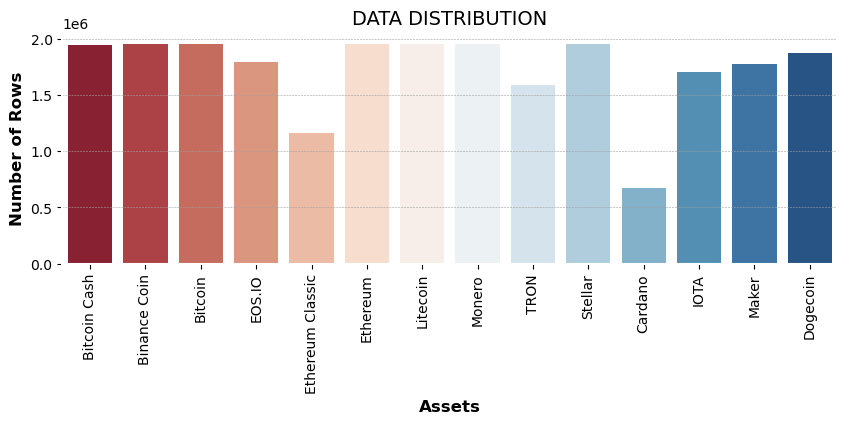

In [25]:
InteractiveShell.ast_node_interactivity = 'last_expr'
plt.figure(figsize=(10, 3))
bar_plot  = sns.barplot(x=asset_names, y=asset_count, palette='RdBu')

plt.title("Data Distribution".upper(), fontsize = 14)
plt.xlabel("Assets")
plt.ylabel("Number of Rows")
plt.xticks(rotation=90)  
plt.show()

In [35]:
crypto_df['date'] = pd.to_datetime(crypto_df['timestamp'], unit='s')
crypto_df = crypto_df.set_index('date')
crypto_df.head(3)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
date,,,,,,,,,,,,
2018-01-01 00:01:00,1514764860,2,40.0000,"2,376.5801","2,399.5000","2,357.1399","2,374.5901",19.2330,"2,373.1164",-0.0042,2.3979,Bitcoin Cash
2018-01-01 00:02:00,1514764920,2,53.0000,"2,374.5532","2,400.8999","2,354.2000","2,372.2866",24.0503,"2,371.4345",-0.0041,2.3979,Bitcoin Cash
2018-01-01 00:03:00,1514764980,2,61.0000,"2,371.6333","2,401.8999","2,353.7000","2,372.0632",42.6764,"2,375.4428",-0.0029,2.3979,Bitcoin Cash


**Number of sample for each asset per year?**

In [27]:
pd.crosstab(index=crypto_df.index.year, columns=crypto_df.Asset_Name)

Asset_Name,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Maker,Monero,Stellar,TRON
row_0,,,,,,,,,,,,,,
2018,525588,524824,516254,3043,444248,372254,524538,0,359861,525588,350276,523450,525587,336463
2019,524969,522998,521768,10440,524724,514334,524870,326093,462965,524894,523198,523106,524720,446855
2020,527014,527008,526023,278773,526887,526570,527022,452065,499790,527010,526565,525865,527014,430397
2021,378711,378707,378574,378241,378701,378709,378710,378708,378645,378708,378710,378706,378709,378356


<a ><font size="2.5"><b>OBSERVATION:</b></font></a>
assets generally have a relatively consistent number of records across the four years of the dataset, with some minor fluctuations. But Dogecoin had no records in 2018

### 2. Candlestick Chart in Financial Data Visualization

For identifying trends, reversals, and patterns in asset prices, a candlestick chart represents the price movement of an asset over a specific time period, like a day, week, or month. 

**Components of a Candlestick**

Each candlestick has four main components:

1. Open Price (Open): The opening price of the asset at the beginning of the period.
2. High Price (High): The highest price the asset reached during the period.
3. Low Price (Low): The lowest price the asset reached during the period.
4. Close Price (Close): The closing price of the asset at the end of the period.

The body of the candlestick represents the price range between the opening and closing prices, while the vertical lines (shadows) extend from the top and bottom of the body to show the highest and lowest prices.

**Bullish and Bearish Candlesticks**

- If the *closing price is higher than the opening price*, the body is typically **green**, indicating a bullish (price increase) period.
- If the *closing price is lower than the opening price*, the body is typically **red**, indicating a bearish (price decrease) period.



**Price movement over week**

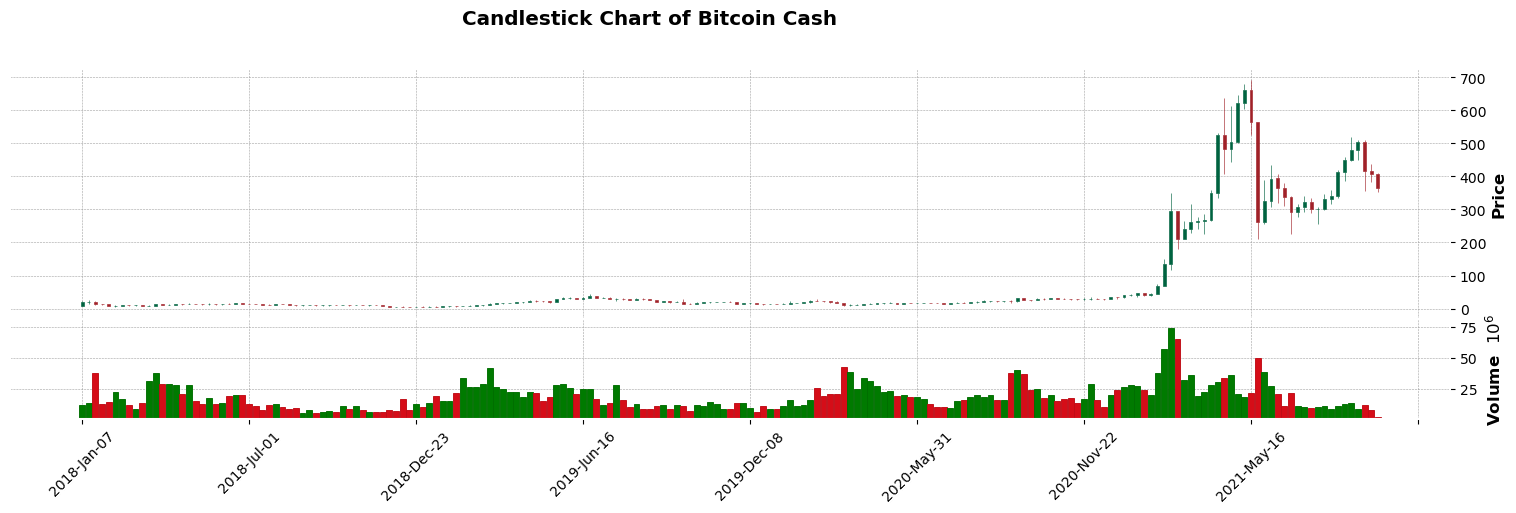

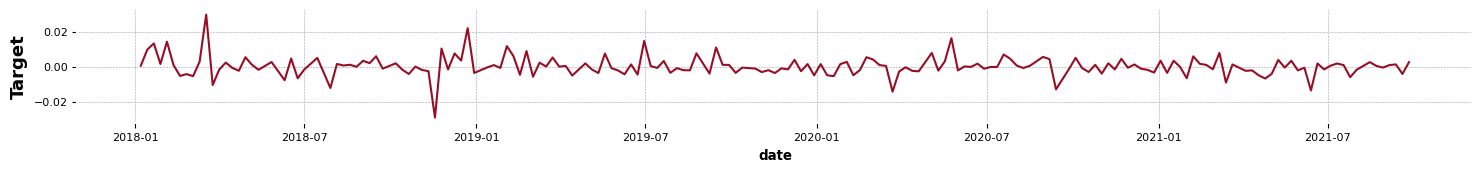

In [22]:
agg = {
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'VWAP': 'mean',
    'Target':'last',
}

for i in asset_names:
    
    df = crypto_df[crypto_df["Asset_Name"]==i]
    df= df.resample('W').apply(agg)
    
    mpf.plot(df, type='candle', style='charles',  figsize=(20, 5), volume=True, title=f"Candlestick Chart of {i}", returnfig=True,);#addplot=VWAP;
    style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
    fig = mpf.figure(figsize=(18, 5), style=style)
    ax_target = fig.add_subplot(3, 1, 1)
    sns.lineplot(data=df, x=df.index, y='Target', ax=ax_target, color=RdBu_colors[0], linewidth=1.5);
    ax_target.set_ylabel('Target', fontsize=13)
    
    plt.show()
    break

## 3. Stationarity  
Stationarity refers to the statistical properties of a time series remaining constant over time, which means that the mean, variance, and autocorrelation structure do not change with time.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [43]:
check_stationarity(crypto_df['Target'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
ADF Statistic: -9.771163
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


In [61]:
check_stationarity(crypto_df['Open'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
ADF Statistic: -2.513002
p-value: 0.112343
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Non-stationary


## 4. Simple Moving Average (SMA)

The provided code includes a function named `MovingAveragePlot` which is used to plot the moving average for a given time series data. The function takes several parameters as input:

**Function Parameters:**

- `series`: The input time series data for which the moving average needs to be calculated and plotted.
- `window`: The rolling window size for the moving average. It determines the number of data points used to calculate the average.
- `plot_intervals`: A boolean flag indicating whether to plot confidence intervals around the smoothed values. If set to `True`, the function will plot upper and lower bounds for the moving average.
- `scale`: A scaling factor used to calculate the confidence intervals. The default value is 1.96, which corresponds to the 95% confidence interval.
- `plot_anomalies`: Another boolean flag indicating whether to highlight anomalies in the time series data. If set to `True`, the function will plot data points that fall outside the confidence intervals.

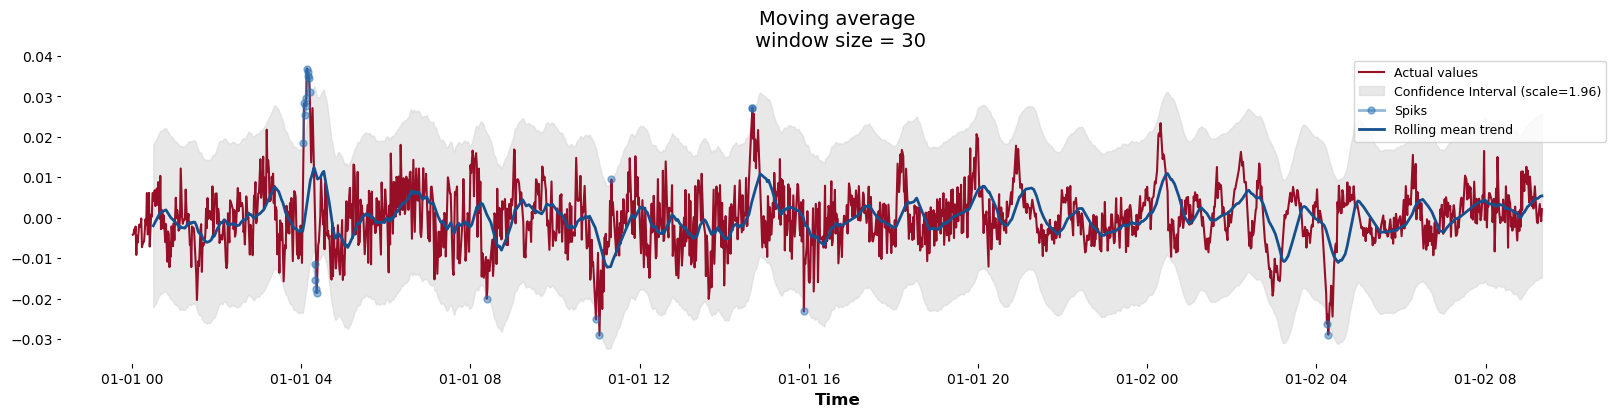

In [66]:
MovingAveragePlot(crypto_df[['Target']].iloc[:2000, 0], window=30, plot_intervals=True, plot_anomalies=True, figsize=(20, 4))

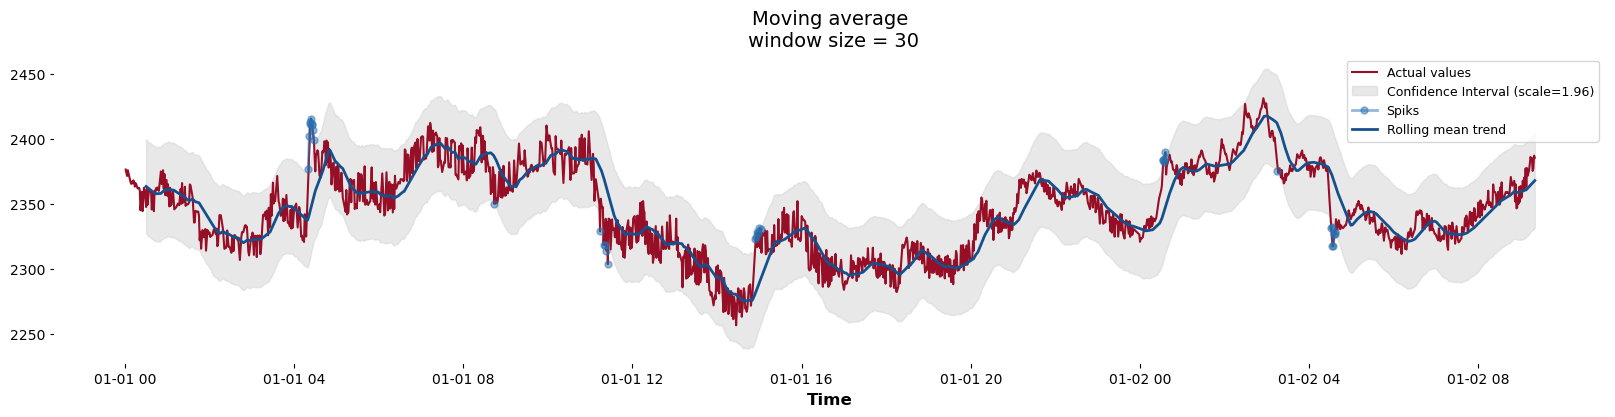

In [69]:
MovingAveragePlot(crypto_df[['Open']].iloc[:2000, 0], window=30, plot_intervals=True, plot_anomalies=True, figsize=(20, 4))

**Moving average for Bitcoin asset**

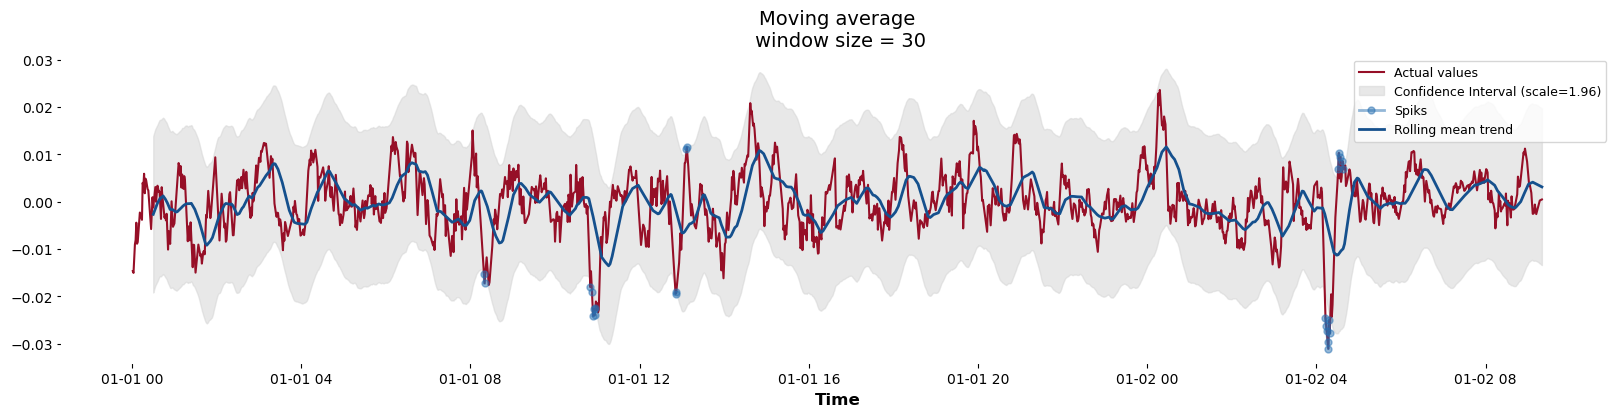

In [70]:
MovingAveragePlot(crypto_df[crypto_df.Asset_Name=='Bitcoin'][['Target']].iloc[:2000,0], window=30, plot_intervals=True, plot_anomalies=True, figsize=(20, 4))

## 5. Exponential Smoothing
Exponential smoothing is a popular method for forecasting time series data and smoothing out random variations to reveal underlying trends. It is particularly useful when the data is noisy or contains irregular fluctuations. It works by assigning exponentially decreasing weights to past observations, with more recent observations receiving higher weights than older ones.
$$F(t+1) = alpha * D(t) + (1 - alpha) * F(t)$$
- The value of alpha typically ranges between 0 and 1.
- Higher alpha values indicating more weight given to recent observations.

**Function Parameters:**
- `series`: The input time series data with timestamps for which exponential smoothing needs to be applied.
- `alphas`: A list of smoothing parameters that controls the weight of the current observation in the smoothing process. It should be a list of float values between 0 and 1.

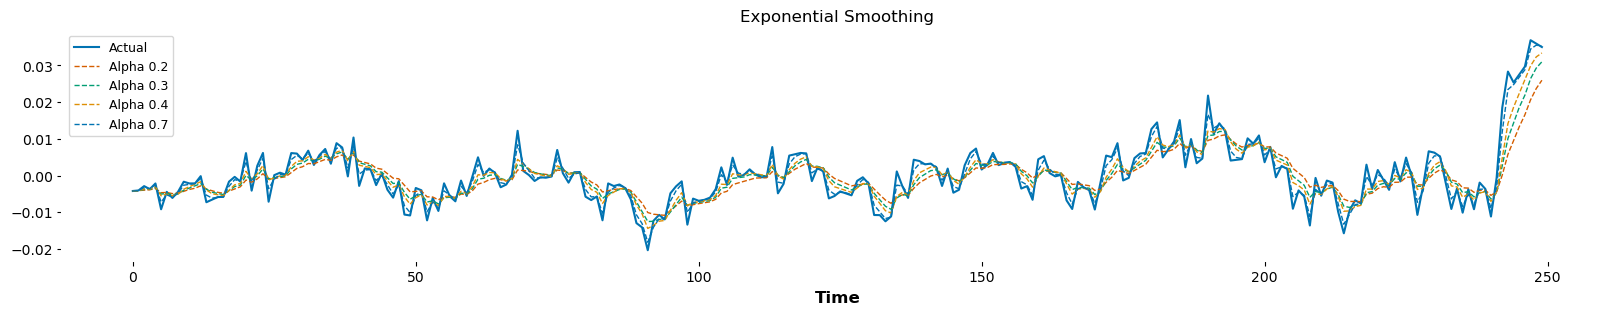

In [71]:
ExponentialSmoothingPlot(crypto_df[['Target']].iloc[:250,0], alphas=[0.2, 0.3, 0.4, 0.7],figsize=(20, 3)) #, plot_anomalies=True, plot_intervals=True, 

**Exponential smoothing for Bitcoin asset**

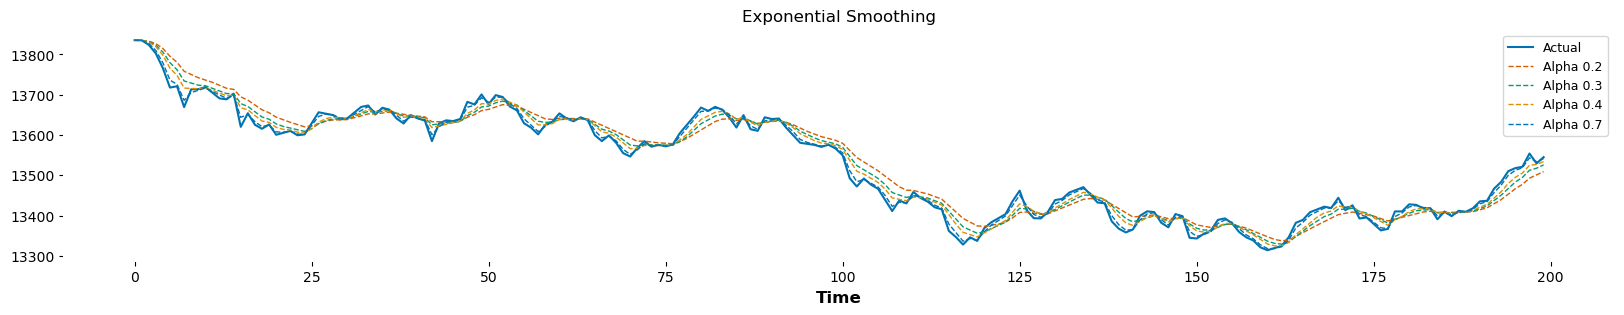

In [72]:
ExponentialSmoothingPlot(crypto_df[crypto_df.Asset_Name=='Bitcoin'][['Open']].iloc[:200,0], alphas=[0.2, 0.3, 0.4, 0.7],figsize=(20, 3)) #, plot_anomalies=True, plot_intervals=True, 

## 6. Average True Range (ATR)
The ATR indicator is based on the range of price movements (high to low) in a given period, taking into account any gaps that might occur between trading sessions. It calculates the average range over a specified number of periods, typically using a rolling or exponential moving average. A higher ATR value indicates greater volatility, while a lower value suggests lower volatility. 

**Calculate the True Range (TR) for each period:**
$$TR = Max[(High - Low), abs(High - Previous Close), abs(Low - Previous Close)]$$

- ATR = Rolling or Exponential Moving Average of the True Range (TR) over the chosen periods.
 

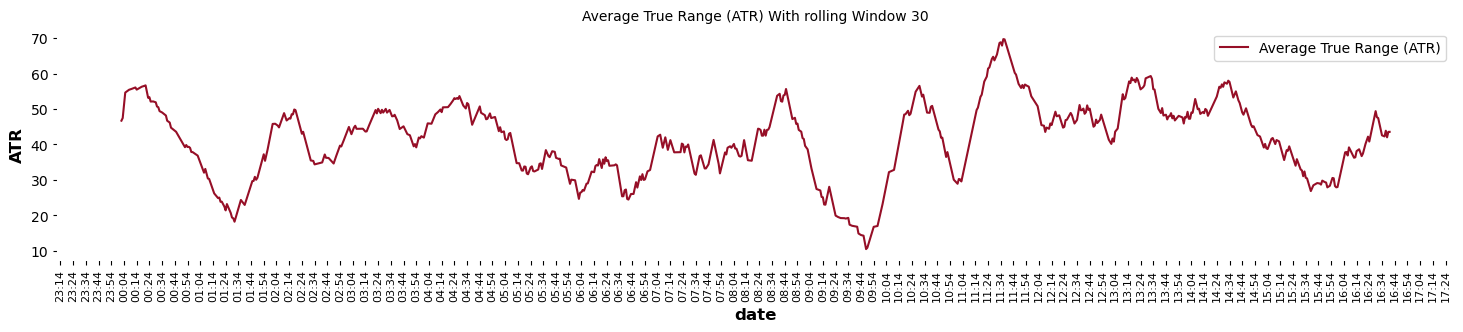

In [76]:
crypto_df['ATR'] = ATR(crypto_df, 30)

plt.figure(figsize=(18, 3))
crypto_df_reset = crypto_df.iloc[:1000, :].reset_index()
sns.lineplot(data=crypto_df_reset,x= 'date', y='ATR', label='Average True Range (ATR)', color=RdBu_colors[0], linewidth=1.5);

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.xticks(rotation=90, fontsize = 8)
plt.title('Average True Range (ATR) With rolling Window 30', fontsize=10)
plt.grid(False)
plt.show()

## 7. Seasonal and Trend Decomposition
Breaking down a time series into three systematic components: trend-cycle, seasonal variation, and random fluctuations. 
- The trend component represents the long-term direction of the time series, which can be increasing, decreasing, or stable over time. 
- The seasonal component represents the recurring patterns that occur within the time series, such as yearly or quarterly cycles. 
- The random fluctuations component represents the random noise in the data that cannot be explained by the trend or seasonal components.

$$Y_t = T_t + S_t + E_t$$

- $Y_t$ represents the observed value at time t.
- $T_t$ represents the trend component at time t.
- $S_t$ represents the seasonal component at time t. 
- $E_t$ represents the residual component at time t.

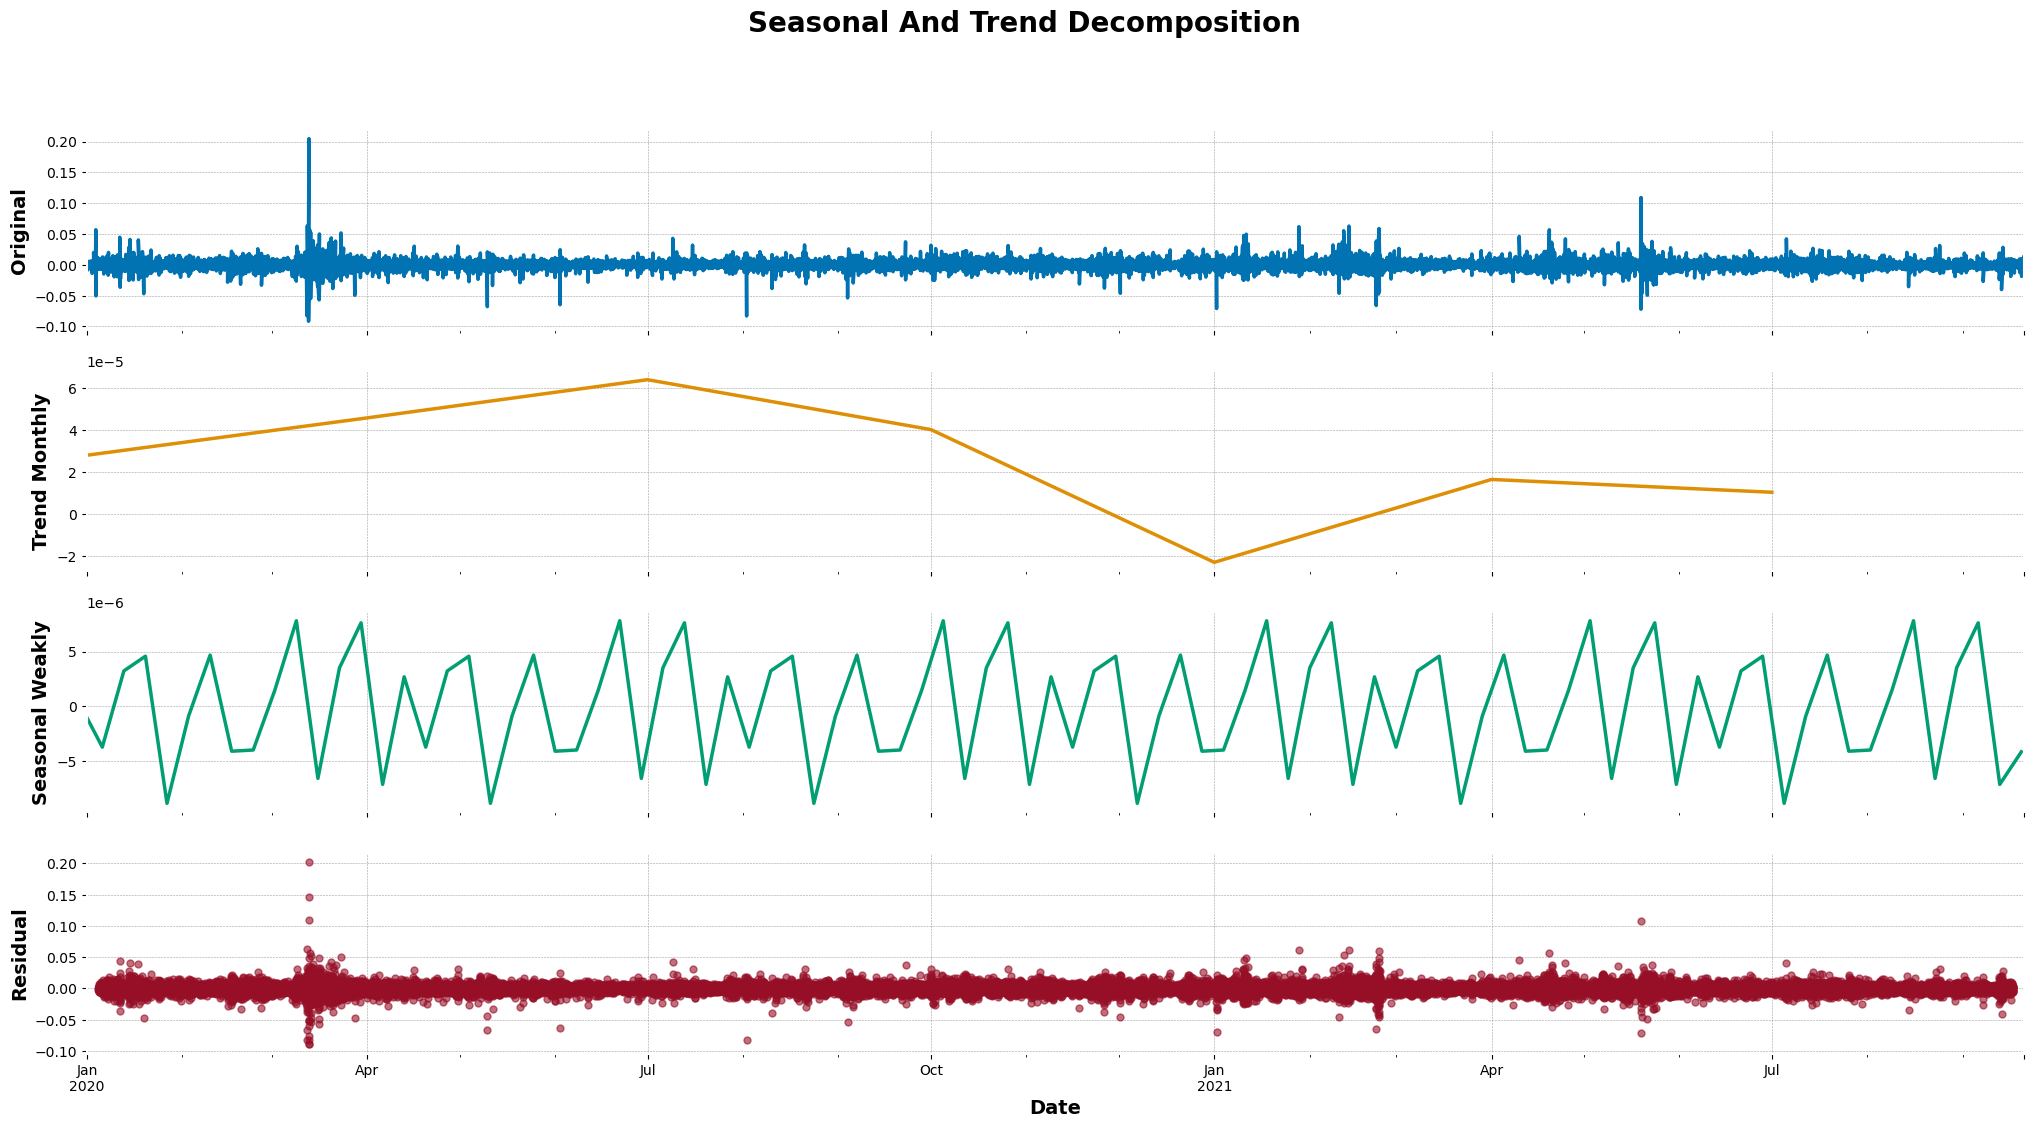

In [26]:
aggs = {'Asset_ID': 'first','Count': 'sum', 'Open':'last', 'High':'last', 'Low':'last', 'Close':'last',
       'Volume':'mean', 'VWAP': 'mean', 'Target':'last'}

df_subset = crypto_df.resample('15T').agg(aggs)

result = seasonal_decompose(df_subset['Target'], model='additive', period=24*30) # weakly
PlotDecomposation(df_subset['Target'], result)

<a ><font size="2.5"><b>OBSERVATION:</b></font></a>

- As seasonal is a repeating pattern over fixed periods, this cause the trend to fluctuate up and down as the seasonal effects interact with the overall trend.
- A recognizable pattern in the residuals, but we will check the autocorrelations using Ljung-Box test.
- We want the residuals to be i.i.d (uncorrelated). If the residuals have a pattern, it means there is still some structural information left to be captured. 

**Ljung-Box Staticl test for Residual:** The Ljung-Box test is a statistical test used to determine whether a set of autocorrelations of a time series are different from zero based on the Q statistic. The Q statistic is a measure of the sum of squared autocorrelations of the residuals up to a certain lag.

In [56]:
resid = result.resid.dropna()
ljung = sm.stats.acorr_ljungbox(resid, return_df=True)
ljung_p_val = np.mean(ljung.iloc[:,1]).round(3)
print("P-value=", ljung_p_val, ", Residuals are uncorrelated, there is no pattern" if ljung_p_val > 0.05 else ", Residuals are correlated")

P value= 0.718 , Residuals are uncorrelated, there is no pattern


<a ><font size="2.5"><b>OBSERVATION:</b></font></a>
Based on this p-value, we have strong evidence of significant serial correlation in the residuals. We can perform transformations to see if it stabilizes the variance. 

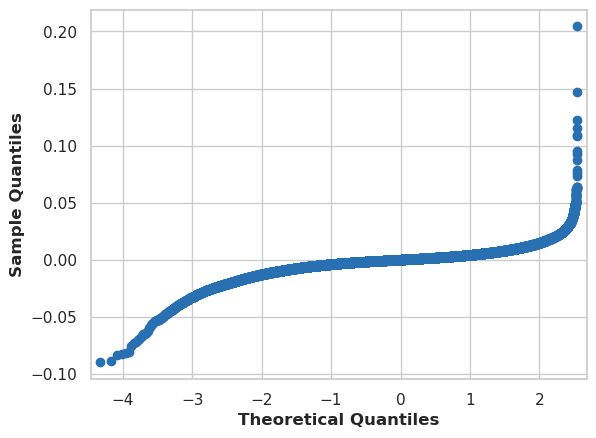

In [29]:
sns.set_theme(style="whitegrid", palette=RdBu_colors[-2:])
sm.qqplot(result.resid, line='s');

## 8. ACF and PACF
A stationary process is much more predictable than a non-stationary process. For the series to be stationary, it must have:
- Constant mean.
- Constant variance.
- Constant covariance (uncorrelated).
- No Seasonality.

We verify this by observing change in mean, variance, autocorrelation and with a statistical test (Auller test)

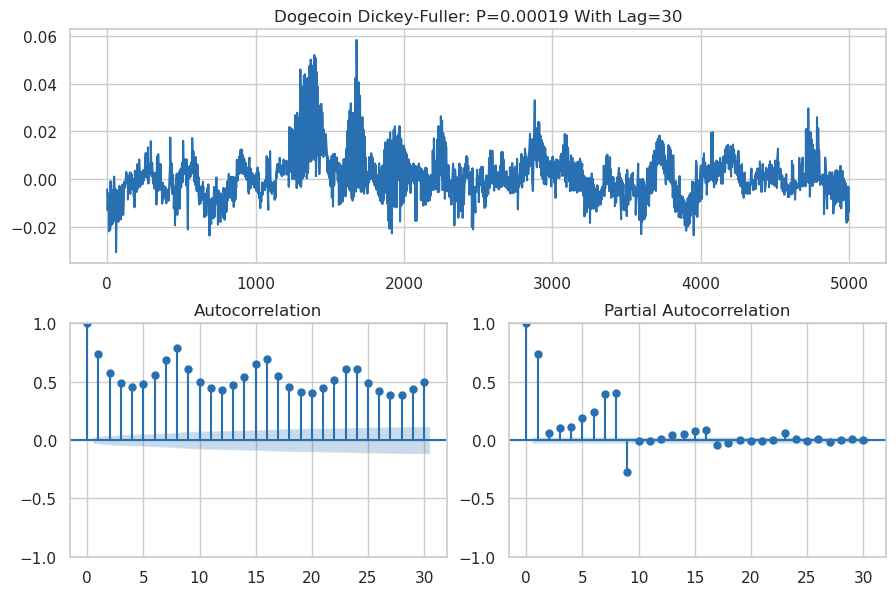

In [30]:
df = crypto_df[:5000]
result = exponential_smoothing(df['Target'], 0.5)
ACF_PACF(result, lags=30, name=i)

---
# (3) Feature Engineering

---

### 1: Technical Indicators Calculation
Calculating three essential technical indicators for each cryptocurrency asset: Relative Strength Index (RSI), Average True Range (ATR), and Double Exponential Moving Average (DEMA). 
> These indicators provide valuable insights into the asset's price momentum, volatility, and potential trend reversal points.

### 2: Lag Features Calculation
Calculate two lag features for each asset: Simple Moving Average (SMA) and Returns. 
> These features are valuable in capturing the asset's price trends over a specific period.

### 3: New Price-based Features

- **HL (High-Low):** The log of the difference between the 'High' and 'Low' prices, indicating the price range.
- **OC (Open-Close):** The log of the difference between the 'Close' and 'Open' prices, capturing the daily price changes.

- **Lower Shadow and Upper Shadow:** The log of the lengths of the lower and upper shadows of the candlesticks.

### 4: Datetime Features
Extract various datetime features from the 'timestamp' column, including:

- Day of the Week: The 'Day' feature represents the day of the week.
- Day of the Year: The 'dayofyear' feature represents the day of the year.
- Season of the Year: The 'season' feature categorizes the month into different seasons.

> These datetime features might reveal patterns related to specific days, times of the year, or seasonality in cryptocurrency price movements.

In [77]:
from tqdm import tqdm
def get_features(df, i):
    
    pbar = tqdm(total=22, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]')        
    # Calculate technical indicators: RSI, ATR, and DEMA for different time periods (30, 120, 240 minutes)
    pbar.set_description(f"Create 22 Features for {i:<16} ")

    for i in [30, 120, 240]:
        df[f'RSI_{i}'] = RSI(df, i)
        pbar.update(1)
        df[f'ATR_{i}'] = ATR(df, i)
        pbar.update(1)
        df[f'DEMA_{i}'] = DEMA(df, i)
        pbar.update(1)
        
    for i in [30, 120, 240]:
        # Create lag features: SMA and returns for different time periods (30, 120, 240 minutes)
        df[f'SMA_{i}'] = df['Close'].rolling(i).mean()/df['Close'] -1
        pbar.update(1)
        df[f'return_{i}'] = df['Close']/df['Close'].shift(i) -1
        pbar.update(1)
    
    # Create new features: HL, OC, lower_shadow, upper_shadow    
    df['HL'] = np.log(df['High'] - df['Low'])
    pbar.update(1)
    df['OC'] = np.log(df['Close'] - df['Open'])
    pbar.update(1)
    df['lower_shadow'] = np.log(lower_shadow(df)) 
    pbar.update(1)
    df['upper_shadow'] = np.log(upper_shadow(df))
    pbar.update(1)
    # replace inf with nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Extract datetime features: Day of the week (Day), day of the year (dayofyear), and season of the year (season)
    df['date'] = pd.to_datetime(df['timestamp'], unit='s')
#     df['Day'] = df['date'].dt.weekday.astype(np.int32)
#     pbar.update(1)
#     df["dayofyear"] = df['date'].dt.dayofyear
    pbar.update(1)
    df["season"] = ((df['date'].dt.month)%12 + 3)//3
    pbar.update(1)
   
    # fill nan values with 0
    df = df.fillna(0)
    pbar.close()
    return df

#### **Prepare crypto_m1 dataset**
Iterate through each cryptocurrency asset one by one, ensuring 60-second intervals, perform feature engineering steps, then concatenate the processed data into the final `crypto_m1` DataFrame. 

In [78]:
crypto_df.index = crypto_df['timestamp']

In [79]:
start_time = time.time()
crypto_1m = pd.DataFrame()

for i in crypto_df.Asset_Name.unique():
    ##### For each asset #####
    feat_df = crypto_df[crypto_df.Asset_Name==i]
    # 1. Reformat the data to remove gaps, ensuring 60-second intervals
    feat_df = feat_df.reindex(range(feat_df.index[0], feat_df.index[-1] + 60, 60), method='pad')
    # 2. Perform feature engineering using the get_features function
    feat_df = get_features(feat_df, i)
    ##### Concate this asset #####
    crypto_1m = pd.concat([crypto_1m,feat_df], axis = 0)
    
print('Total Elapse Time: {:0.2f} sec'.format(time.time() - start_time) )

Create 22 Features for Dogecoin         :  95%|█████████▌| 21/22 [00:01<00:00]


Total Elapse Time: 53.06 sec


In [80]:
crypto_1m.set_index('date', inplace = True)
crypto_1m = crypto_1m.drop(['Close','High','Low', 'Volume','timestamp','Asset_Name'], axis=1)
column = crypto_1m.pop('Open')
crypto_1m['Open'] = column

In [81]:
reduce_memory(crypto_1m);

Memory taken before transformation :  4694407740
Memory taken after transformation :  3233925332
Memory taken reduced by :  31.11111111111111 %


#### **Save prepared dataset**

In [ ]:
# crypto_1m.to_csv('./Datasets/CustomData/crypto_1m_origin.csv')

---
# (4) Create new datasets with diffrent sampling

---

### Aggregation and Resampling
Aggregate dataset to create new version (hourly sample version). Iterate over the asset groups (14 groups in this case) and perform the aggregation and resampling operations.
For each asset group:
1. Resample function to convert the data from one-minute intervals to hourly intervals ('H').  
2. Aggragte the features, the 'Count' values are summed, and some other variables are averaged. The rest features used the 'last' value.

In [86]:
def Sampling(df, n, lag):
    
    aggs = {'Count': 'sum', 'HL':'mean', 'OC':'mean', 'upper_shadow':'max', 'lower_shadow':'min',
            'VWAP': 'mean', 'season': 'median', 'Open':'first'}

    cols = ['RSI_30', 'ATR_30','DEMA_30', 'RSI_120', 'ATR_120', 'DEMA_120', 
            'RSI_240', 'ATR_240',  'Target', 'DEMA_240', 'SMA_30', 
            'return_30', 'SMA_120', 'return_120', 'SMA_240','return_240',]
    for col in cols:
        aggs[col] = 'last'

    sampled_data = pd.DataFrame()

    pbar = tqdm(total=n, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]')        
    for i in range(n):
        pbar.set_description(f"Resample {i:<16} ")
        
        sample = df[df.Asset_ID== i]
        sample = sample.resample(lag).agg(aggs)
        sample.reset_index(inplace=True)
        sampled_data = pd.concat([sampled_data,sample], axis = 0)
        pbar.update(1)
        
    pbar.close()
    
    return sampled_data

**Original Features: samples lag = 1 اhour**

In [87]:
crypto_1h = Sampling(crypto_1m, 1, 'H')

Resample 0                : 100%|██████████| 1/1 [00:00<00:00]


In [88]:
print('Shape: ', crypto_1h.shape)
print('Columns: ', list(crypto_1h.columns))

Shape:  (32617, 25)
Columns:  ['date', 'Count', 'HL', 'OC', 'upper_shadow', 'lower_shadow', 'VWAP', 'season', 'Open', 'RSI_30', 'ATR_30', 'DEMA_30', 'RSI_120', 'ATR_120', 'DEMA_120', 'RSI_240', 'ATR_240', 'Target', 'DEMA_240', 'SMA_30', 'return_30', 'SMA_120', 'return_120', 'SMA_240', 'return_240']


In [89]:
crypto_1h = crypto_1h.dropna()
crypto_1h.isna().sum().sum()

0

In [90]:
reduce_memory(crypto_1h);

Memory taken before transformation :  3774292
Memory taken after transformation :  3644144
Memory taken reduced by :  3.4482758620689653 %


In [92]:
target = crypto_1h.pop('Open')
crypto_1h['Open'] = target

In [98]:
crypto_1h.head(3)

,date,Count,HL,OC,upper_shadow,lower_shadow,VWAP,season,RSI_30,ATR_30,DEMA_30,RSI_120,ATR_120,DEMA_120,RSI_240,ATR_240,Target,DEMA_240,SMA_30,return_30,SMA_120,return_120,SMA_240,return_240,Open
0,2018-01-01 00:00:00,"1,169.0000",-3.6074,-1.0465,0.0000,-9.2186,8.3703,1.0000,50.7339,0.0285,8.3267,41.1973,0.0332,8.3568,41.1973,0.0332,-0.0080,8.4141,-0.0016,0.0010,0.0000,0.0000,0.0000,0.0000,8.5300
1,2018-01-01 01:00:00,774.0000,-3.7448,-1.6847,0.0000,-9.2186,8.3149,1.0000,32.6884,0.0231,8.2465,42.2042,0.0314,8.2814,42.2042,0.0314,0.0111,8.3277,0.0103,-0.0182,0.0000,0.0000,0.0000,0.0000,8.3558
2,2018-01-01 02:00:00,668.0000,-3.3273,-2.1219,0.0000,-9.2186,8.2816,1.0000,51.8479,0.0278,8.2831,47.9574,0.0280,8.2541,45.5806,0.0297,0.0046,8.2712,-0.0013,0.0022,0.0021,-0.0089,0.0000,0.0000,8.2200


In [94]:
crypto_1h.to_csv('./Datasets/CustomData/crypto_1h.csv', index=False)

#### **Quick Time Series Analysis after aggregation**

In [99]:
check_stationarity(crypto_1h['Target'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
ADF Statistic: -9.371986
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Stationary


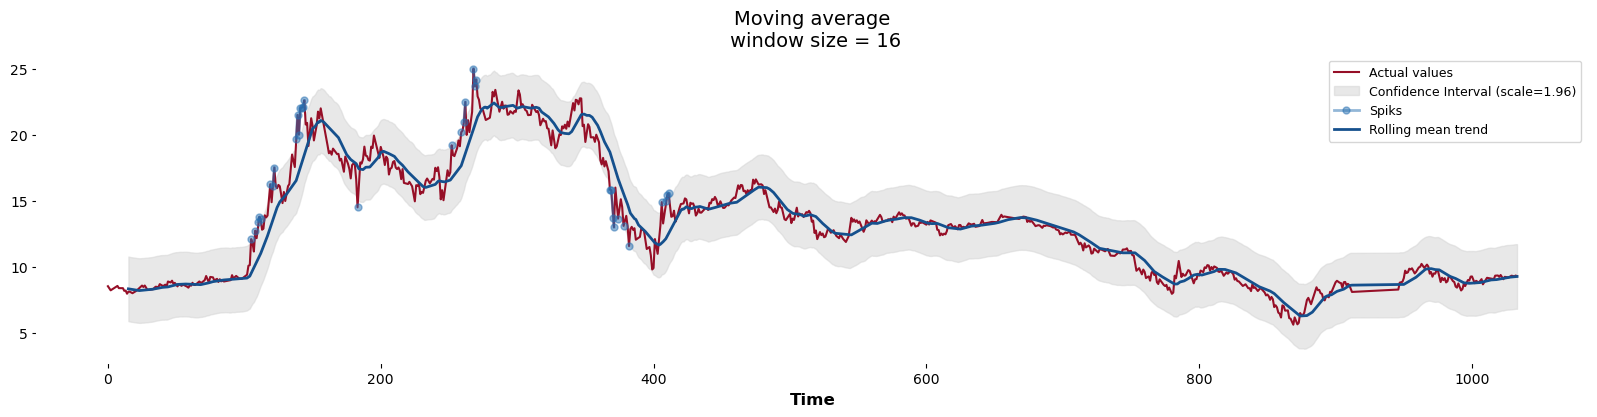

In [100]:
MovingAveragePlot(crypto_1h.iloc[:1000, -1], window=16, plot_intervals=True, plot_anomalies=True, figsize=(20, 4))

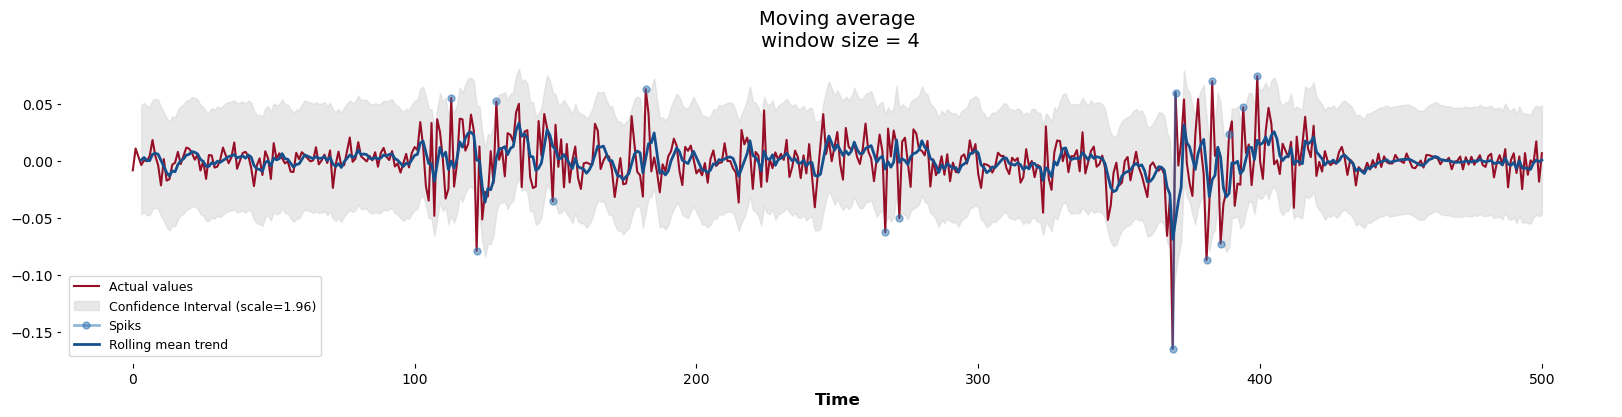

In [101]:
MovingAveragePlot(crypto_1h.iloc[:500, -9], window=4, plot_intervals=True, plot_anomalies=True, figsize=(20, 4))

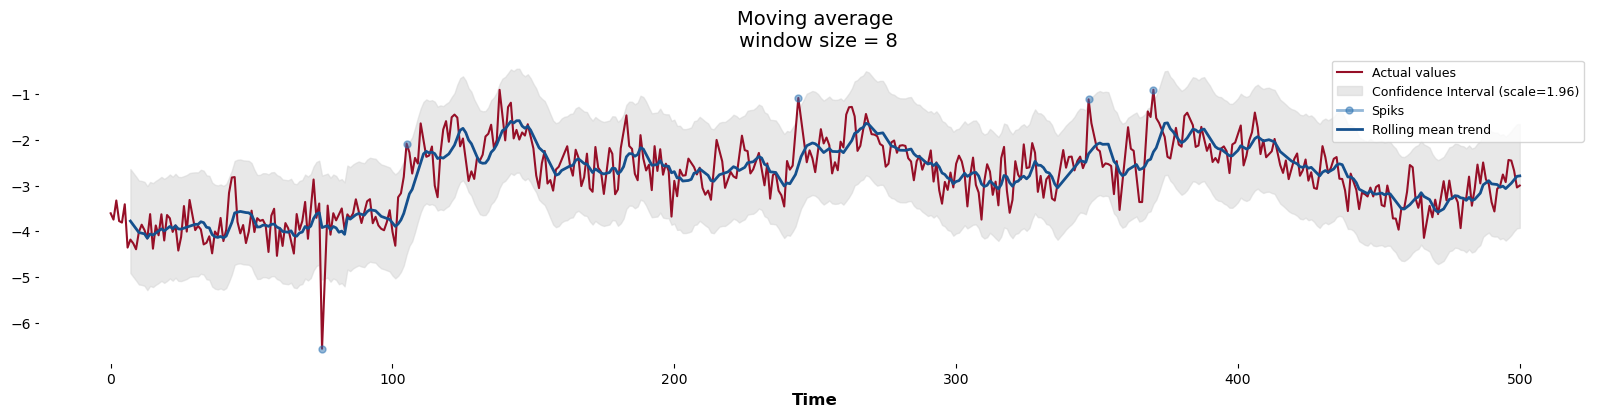

In [102]:
MovingAveragePlot(crypto_1h.iloc[:500, 2], window=8, plot_intervals=True, plot_anomalies=True, figsize=(20, 4))

---
<h1 style="text-align:center;">Modeling Hourly Cryptocurrancy Dataset</h1>

---

In [103]:
def Evaluate( model_name, pred_len, ax, colors):
    """
    Plots the predicted and true values for a given model and prediction horizon (pred_len).

    Args:
    model_name (str): The name of the model used to make predictions.
    pred_len (int): The length of the prediction horizon (i.e., the number of future values to predict).
    ax (matplotlib.axes.Axes): A Matplotlib Axes object on which to draw the plot.
    colors (List[str]): A list of two colors to use for the actual and predicted lines, respectively.
    
    """
    
    InteractiveShell.ast_node_interactivity = 'last_expr'
    
    setting = model_name+'_train_on_Bitcoin_'+str(pred_len)
    trues = np.load('./results/'+ setting +'/true.npy') # [samples, pred_len, dimensions]
    preds = np.load('./results/'+ setting +'/pred.npy') # [samples, pred_len, dimensions]
    mae, mse, rmse, mape, mspe = np.load('./results/'+ setting +'/metrics.npy', allow_pickle=True) 
    print(setting + '\t: mae:{:0.2f}, mse:{:0.2f}, rmse:{:0.2f}, mape:{:0.2f}, mspe:{:0.2f}'.format(mae, mse, rmse, mape, mspe))
    
    for i, data in enumerate([trues[0,:,-1], preds[0,:,-1]]):
        sns.lineplot(x=range(len(data)), y=data, label=["Actual", model_name][i], color=colors[i], ax=ax)
    ax.set_title(f"{model_name} results of {pred_len} future values of `Target` column".title())
    ax.legend()

---
### 1. Evaluating the crypto_1h on NLinear

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
pred_lens = [96, 192, 336, 720]
for i, pred_len in enumerate(pred_lens):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate("NLinear", pred_len,ax, colors)

plt.show()

---
### 3. Evaluating the dataset Informer
 


informer_train_on_Bitcoin_96	: mae:0.42, mse:0.34, rmse:0.59, mape:1.62, mspe:864.93
informer_train_on_Bitcoin_192	: mae:0.42, mse:0.34, rmse:0.59, mape:1.46, mspe:412.14
informer_train_on_Bitcoin_336	: mae:0.42, mse:0.34, rmse:0.59, mape:1.42, mspe:364.67
informer_train_on_Bitcoin_720	: mae:0.42, mse:0.35, rmse:0.59, mape:1.66, mspe:1027.10


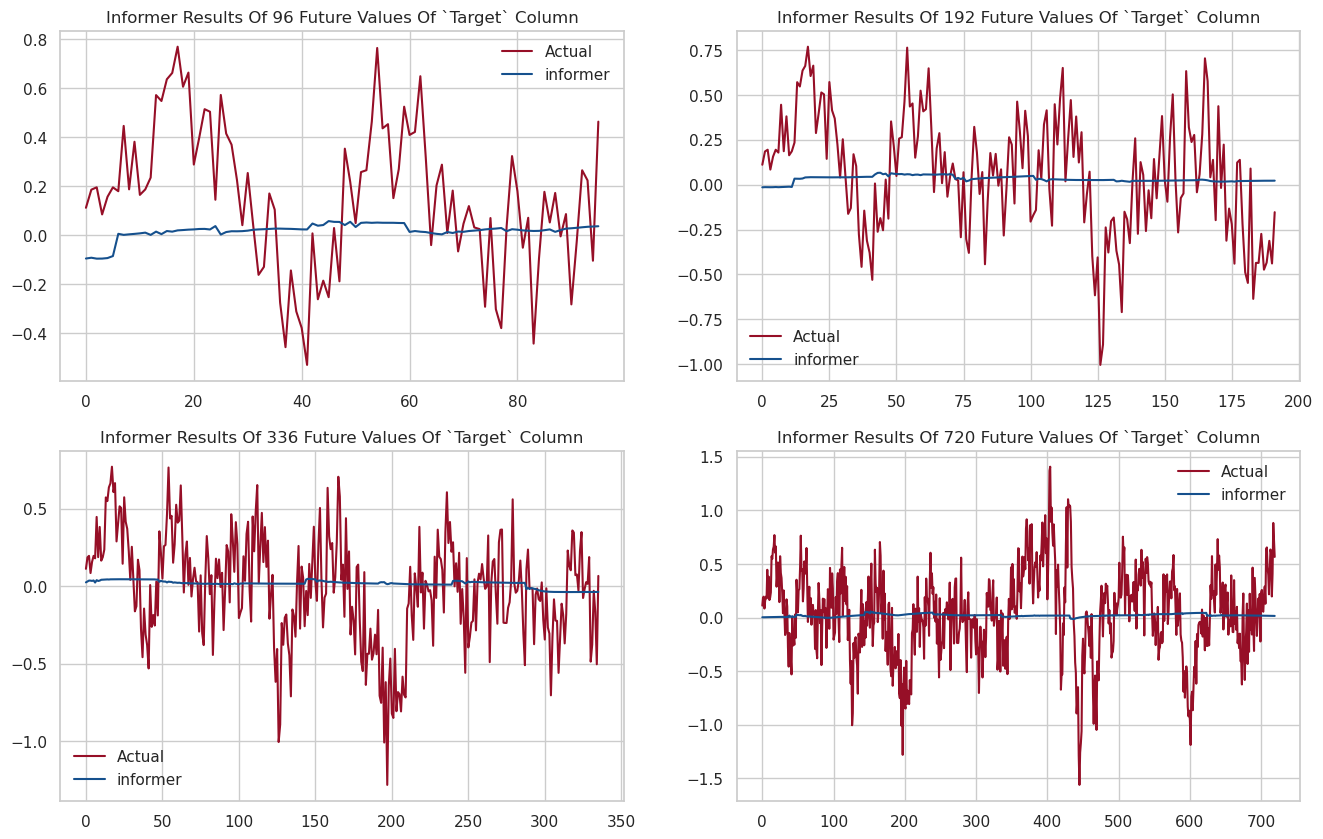

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate(pred_lens):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate("informer", pred_len,ax, colors)

plt.show()

---
### 5. Evaluating the dataset FEDfromer


FEDformer_train_on_Bitcoin_96	: mae:1.39, mse:3.16, rmse:1.78, mape:31.84, mspe:1245519.50
FEDformer_train_on_Bitcoin_192	: mae:1.55, mse:3.79, rmse:1.95, mape:34.70, mspe:1438758.25
FEDformer_train_on_Bitcoin_336	: mae:1.57, mse:3.87, rmse:1.97, mape:34.67, mspe:1476521.12
FEDformer_train_on_Bitcoin_720	: mae:1.64, mse:4.21, rmse:2.05, mape:38.43, mspe:1740615.25


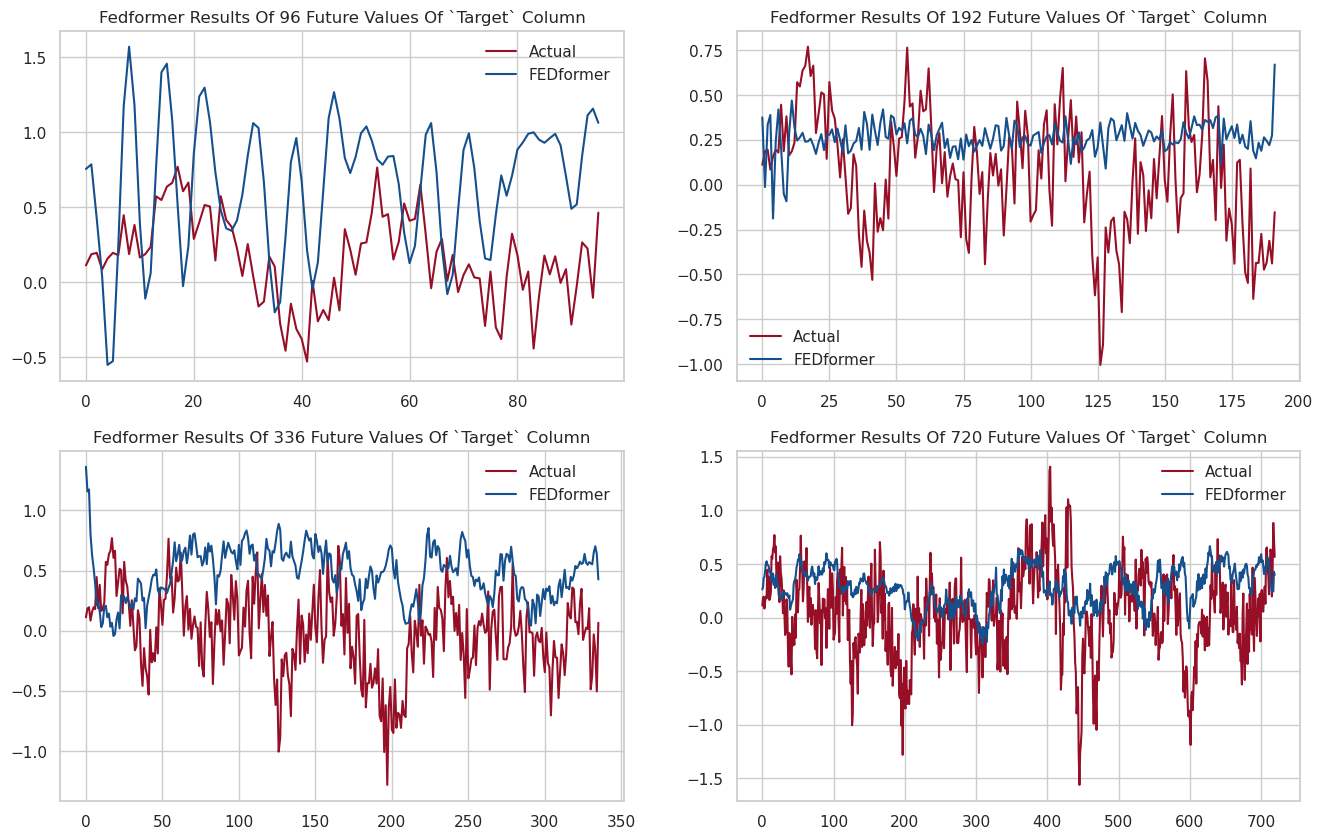

In [29]:
model_name = "FEDformer"
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, pred_len in enumerate(pred_lens):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate(model_name, pred_len, ax, colors)

plt.show()

---
### 5. Evaluating the dataset PathchTST

PatchTST_train_on_Bitcoin_96	: mae:0.42, mse:0.34, rmse:0.59, mape:1.97, mspe:1722.32
PatchTST_train_on_Bitcoin_192	: mae:0.42, mse:0.34, rmse:0.59, mape:1.94, mspe:1947.81
PatchTST_train_on_Bitcoin_336	: mae:0.42, mse:0.35, rmse:0.59, mape:1.99, mspe:1961.19
PatchTST_train_on_Bitcoin_720	: mae:0.42, mse:0.35, rmse:0.59, mape:1.70, mspe:994.00


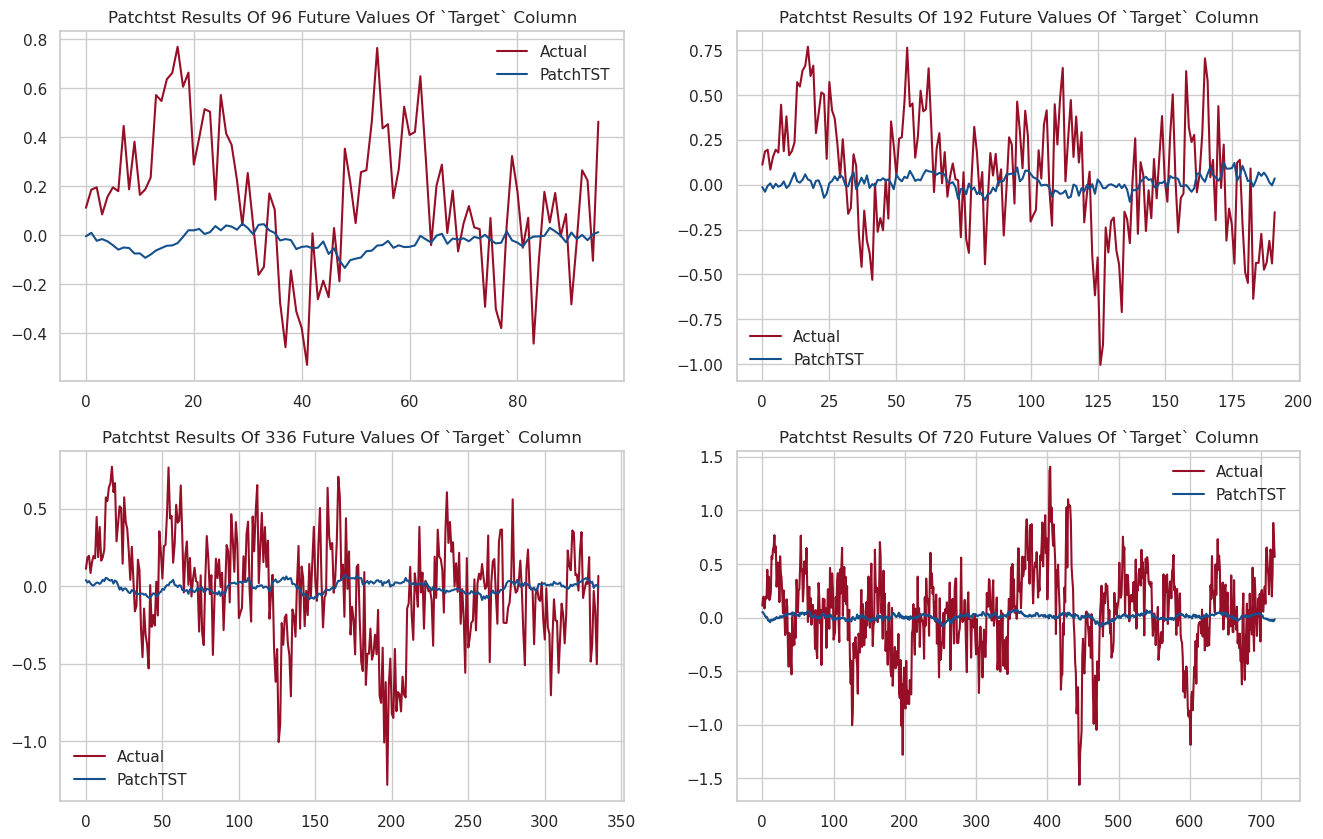

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
pred_lens = [96,192,336,720]

for i, pred_len in enumerate(pred_lens):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Evaluate("PatchTST", pred_len,ax, colors)

plt.show()